In [ ]:
# Keiana Dunn
# Project 2 
# Pima Indians - Diabetes prediction (Python 3)
# Neural Network for binary classification - Predictive Modeling
# Date: 4/24/19

# Import necessary libraries

In [1]:
from keras.models import Sequential # Keras builds NN
from keras.layers import Dense
from keras import optimizers
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(7)

/home/ktd2001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load data, Assign labels, Fit the model and Split data

In [2]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
print(dataset)

x = ['y','y','n','y','y','n','y','n']

encoder = LabelEncoder()     # Encoder used to assigning labels categorical 
encoder.fit(x)               # Fit encoder on to labels
encoded_x = encoder.transform(x)

print(encoded_x)   #Print newly assigned labels for x

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# Shows # of observations and variables
print(dataset.shape) 

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
[1 1 0 1 1 0 1 0]
(768, 9)


# Build Neural Network

In [3]:
# Create sequential model 
model = Sequential()
# Add Multilayer Perceptron with binary classes and activation functions
model.add(Dense(12, input_dim=8,activation='relu')) #12 neurons using relu activation function
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

Instructions for updating:
Colocations handled automatically by placer.


# Compile neural network model with learning rate, optimizer, loss function and accuracy metric

In [4]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model by training neural network

In [5]:
history = model.fit(X,Y,epochs=150,batch_size=10, verbose=0)

Instructions for updating:
Use tf.cast instead.


# Predicted input values

In [6]:
Y_predict = model.predict(X) 

# Evaluate efficiency and performance of the model now that NN is built 

In [7]:
scores = model.evaluate(X, Y)   # Evaluation of the loss function for a given inputs

768/768 [==============================] - 0s 130us/step


# List all data in history and accurancy rate

In [8]:
#print(history.history.keys())
# accuracy
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#loss
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


acc: 79.04%

loss: 47.40%


# Create confusion matrix details

In [9]:
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64') # create np array using y-pred values
print('Confusion Matrix')   # Used on classification models that are using data with known values
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  #Actually No and predicted No
print('False negatives:',CM[1,0]) #Actually Yes but predicted No 
print('False positives:',CM[0,1]) #Actually No but predicted Yes
print('True positives:',CM[1,1])  #Actually Yes and predicted Yes

Confusion Matrix
True negatives: 403
False negatives: 64
False positives: 97
True positives: 204


In [ ]:
#Y_predict # Predictions

In [ ]:
#plt.plot(Y_predict:8)
#plt.title("A")
#plt.xlabel("col")
#plt.ylabel('')
#plt.show()

In [10]:
# Create count of the number of epochs
epoch_count = range(1, len(X) + 1)
print(epoch_count)

range(1, 769)


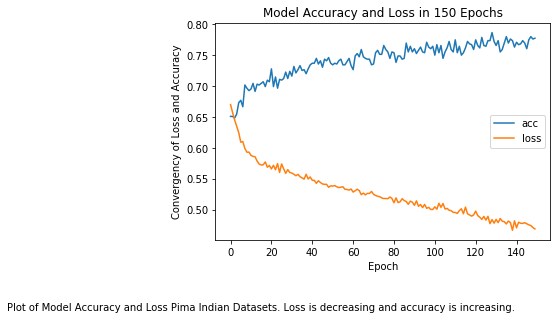

In [11]:
#Plot figure
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 150 Epochs')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
plt.text(15, 0.35, 'Plot of Model Accuracy and Loss Pima Indian Datasets. Loss is decreasing and accuracy is increasing.', ha='center', va='top')
plt.show()

# Learning rate 0.01 and epochs 1000

In [12]:
# Create model - Multilayer Perceptron with activation functions
model = Sequential()
# Connected layers changed
model.add(Dense(12, input_dim=8,activation='relu')) #12 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Changed Learning Rate to 0.01 
adam_1000 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0)

# Evaluate the model efficiency and performance
scores_1000 = model.evaluate(X, Y)
Y_predict_1000 = model.predict(X)

# Accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_1000[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_1000[0]*100))
      
# Create confusion matrix details
rounded_1000 = [round(i[0]) for i in Y_predict_1000]
y_pred_1000 = np.array(rounded_1000,dtype='int64')# create np array using y-pred values
print('Confusion Matrix')   # Used on classification models that are using data with known values
print('================')
CM = confusion_matrix(Y, y_pred_1000)
print('True negatives:',CM[0,0])  #Actually No and predicted No
print('False negatives:',CM[1,0]) #Actually Yes but predicted No 
print('False positives:',CM[0,1]) #Actually No but predicted Yes
print('True positives:',CM[1,1])  #Actually Yes and predicted Yes

768/768 [==============================] - 0s 134us/step

acc: 81.25%

loss: 41.27%
Confusion Matrix
True negatives: 424
False negatives: 68
False positives: 76
True positives: 200


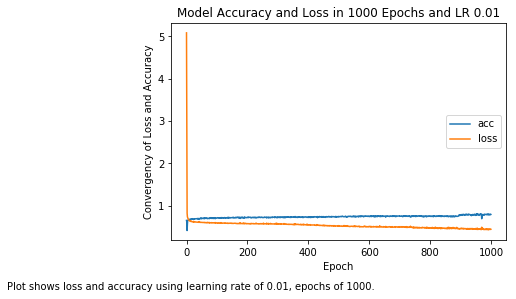

In [13]:
# Plot figure
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs and LR 0.01')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc ='center right')
plt.text(15, -0.8, 'Plot shows loss and accuracy using learning rate of 0.01, epochs of 1000.', ha='center', va='top')
plt.show()

We have our steep decline in loss and accurancy is slowy improving with a learning rate of 0.01.

# Learning rate 0.1 and epochs 15000 

In [14]:
# create model - Multilayer Perceptron with activation functions
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu')) #12 neurons using relu activation function
model.add(Dense(8, activation='relu')) # 8 neurons using relu activation function
model.add(Dense(1, activation='sigmoid')) #Single neuron used to produce a probability output in range of 0 to 1 

# Compile model 
adam_15000 = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model 
history = model.fit(X,Y,epochs=15000,batch_size=10, verbose=0)

# Evaluate the model efficiency and performance
scores_15000 = model.evaluate(X, Y)
Y_predict_15000 = model.predict(X)

# Accuracy and Loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


# Create confusion matrix details
rounded_15000 = [round(i[0]) for i in Y_predict_15000]
y_pred_15000 = np.array(rounded_15000,dtype='int64')
print('Confusion Matrix')   # Used on classification models that are using data with known values
print('================')
CM = confusion_matrix(Y, y_pred_15000)
print('True negatives:',CM[0,0])  #Actually No and predicted No
print('False negatives:',CM[1,0]) #Actually Yes but predicted No 
print('False positives:',CM[0,1]) #Actually No but predicted Yes
print('True positives:',CM[1,1])  #Actually Yes and predicted Yes

768/768 [==============================] - 0s 181us/step

acc: 79.04%

loss: 47.40%
Confusion Matrix
True negatives: 461
False negatives: 84
False positives: 39
True positives: 184


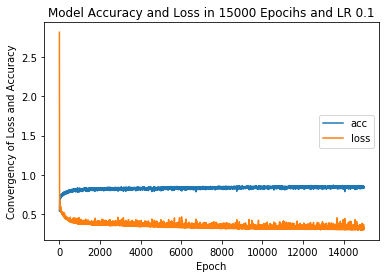

In [15]:
#Plot figure
plt.plot(history.history['acc']) 
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 15000 Epocihs and LR 0.1')
plt.ylabel('Convergency of Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='center right')
#plt.text(25,-3, 'Plot shows loss and accurancy with a learning rate of 0.1 and epochs of 15000.', ha='center', va='top')
plt.show()

We have our steep decline in loss and accurancy is not improving with learning rate of 0.1.

# Reflection

The default learning rate within the Adam optimizer of 0.001 produces the most amount of efficiency for this model.   